# Homework 6
## ECE 204 Data Science & Engineering

*Warning: this notebook reuses certain variable names, which can cause conflict. They're found in multiple questions. If you have any difficulty, please restart your kernel in the menu above.*

## K-Nearest Neighbors

Following are few questions that deal with the Wisconsin Breast Cancer dataset `"breast-cancer-wisconsin.csv"`. The fun fact about this data is that it originates from the University of Wisconsin itself! If you are interested, you can read more about it here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) <br>

The 30 features in this data describe certain characteristics of a cell nuclei that can be used to predict whether a tumor is `Malignant` or `Benign`. We will employ the KNN algorithm to do this classification/diagnosis.

The `diagnosis` column in this data contains the "label" information for training where the labels `0 = "Benign"` and `1 = "Malignant"`. The other columns represent the various features. You can find detailed attribute information regarding what each feature means at the link above. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

---
**Problem 1.**
We have 30 features in this dataset. As it often turns out, some features are more important than others in a given scenario. Our ultimate objective is to classify whether a tumor is malignant or benign based on a certain set of features in a data point. This data is encoded in the `diagnosis` column as 1 and 0 respectively.

Plot the following feature columns against each other. **Which pair of features represent the most clear separation of classes among the pairs given below?**

1. area_mean vs concavity_mean
2. fractal_dimension_mean vs symmetry_mean
3. smoothness_mean vs texture_mean
4. texture_mean vs fractal_dimension_mean

`Hint:` While plotting, remember that you can use `dfbc.plot.scatter(..., c=column_name, cmap='viridis')`. This will show `column_name` in different colors based on value. Using different colors for different classes will help you visualize the separation.

In [2]:
dfbc = pd.read_csv("breast-cancer-wisconsin.csv")
dfbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


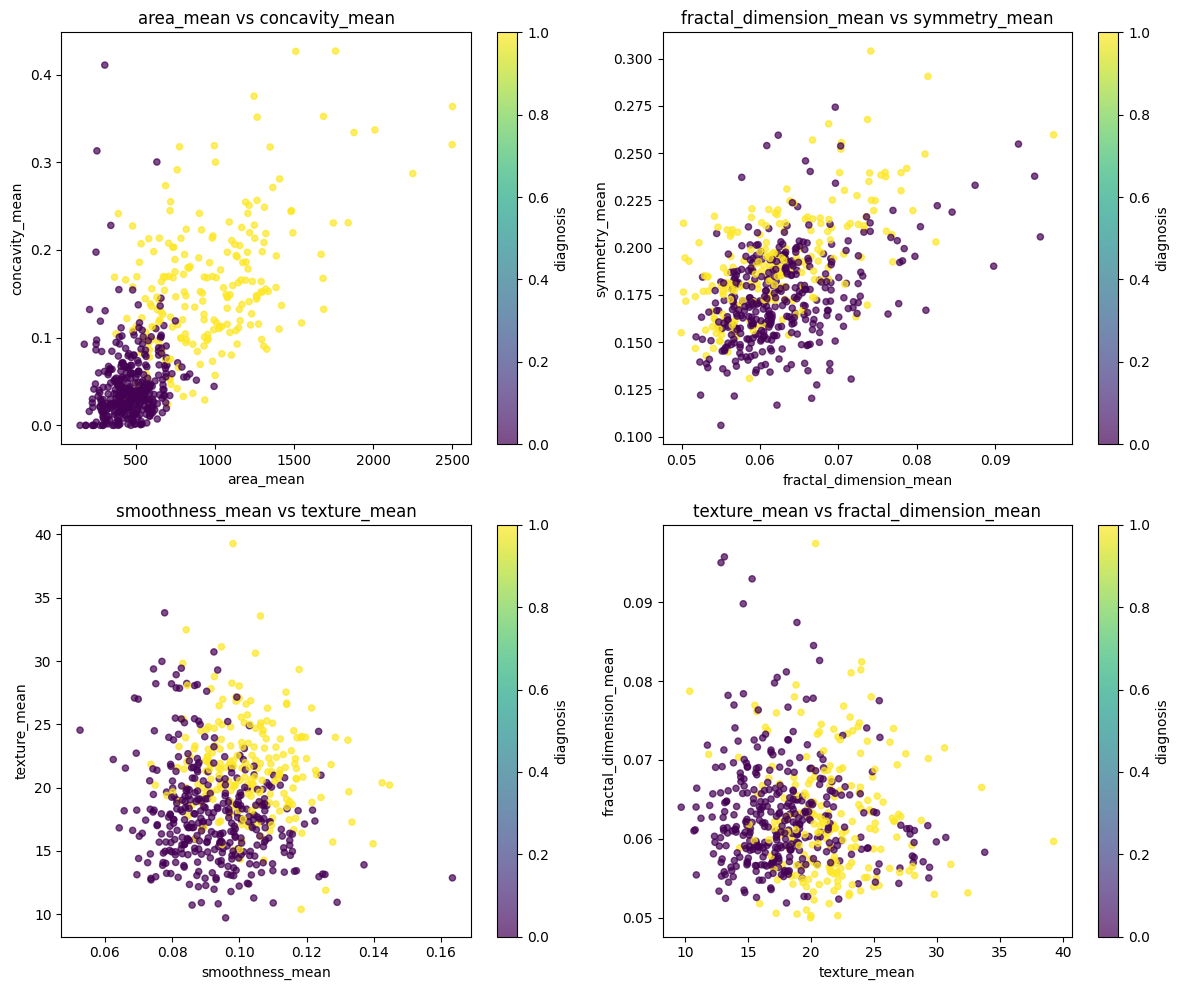

In [3]:
feature_pairs = [
    ("area_mean", "concavity_mean"),
    ("fractal_dimension_mean", "symmetry_mean"),
    ("smoothness_mean", "texture_mean"),
    ("texture_mean", "fractal_dimension_mean")
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(feature_pairs):
    dfbc.plot.scatter(
        x=x_col,
        y=y_col,
        c="diagnosis",
        cmap="viridis",
        alpha=0.7,
        ax=axes[i]
    )
    axes[i].set_title(f"{x_col} vs {y_col}")

plt.tight_layout()
plt.show()

---
**Problem 2.**
In the Wisconsin-Breast-Cancer dataset from last question, train a KNN model with $K = 11$ on provided preprocessed dataset described below. **What is the accuracy of this model?**

As a preprocessing step, you have been given code that does the following:

- splits the dataset into a train/test set. It uses 70% of the dataset for training, and 30% for testing.
- normalizes the features. It scales each feature so the mean is 0 and the standard deviation is 1.

In [4]:
## Code given for convenience
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reading data
dfbc = pd.read_csv("breast-cancer-wisconsin.csv")

# Defining features and labels
Y = dfbc.iloc[:, 0]  # the first column is the label
X = dfbc.iloc[:, 1:]  # the other columns are the features

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Normalize the dataset
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_normalized, Y_train)
Y_pred = knn.predict(X_test_normalized)

round(accuracy_score(Y_test, Y_pred), 4)

0.9591

---
**Problem 3.**
Let's try to find the best value of K for the example in the previous question. You have already been given preprocessing steps for splitting and normalizing the data. Fit the KNN on the normalized training, and then measure the accuracy on the normalized testing data. Do this for all values of K from 1 to 20. **What value of K in the range 1-20 yields the highest accuracy score for the normalized test set?**

*Hint:* Run the classifier model fitting and predicting in a loop for each value of K from 1 to 20, saving the value of accuracy at each iteration in a list or a dictionary.

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reading data
dfbc = pd.read_csv("breast-cancer-wisconsin.csv")

# Splitting the dataset
X = dfbc.iloc[:, 1:]
Y = dfbc.iloc[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Normalize the dataset
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

accuracy_list = []
max_accuracy = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_normalized, Y_train)
    Y_pred = knn.predict(X_test_normalized)
    accuracy = round(accuracy_score(Y_test, Y_pred), 4)
    accuracy_list.append((k, accuracy))
    if accuracy > max_accuracy:
        max_accuracy = accuracy

accuracy_list, [k for k, acc in accuracy_list if acc == max_accuracy]

([(1, 0.9357),
  (2, 0.9415),
  (3, 0.9357),
  (4, 0.9474),
  (5, 0.9591),
  (6, 0.9591),
  (7, 0.9591),
  (8, 0.9532),
  (9, 0.9649),
  (10, 0.9591),
  (11, 0.9591),
  (12, 0.9591),
  (13, 0.9591),
  (14, 0.9591),
  (15, 0.9591),
  (16, 0.9532),
  (17, 0.9474),
  (18, 0.9474),
  (19, 0.9415),
  (20, 0.9474)],
 [9])

## Decision Trees

The next set of two questions will focus on the data in `airports.csv`. The dataset lists over 3,000 airports in the US, including the state they're located in, the latitude, and the longitude. These questions will ask you to train a decision tree classifier from string labels in the prediction variables. Scikit-Learn supports using string arrays as prediction variables, at least when doing classification.

---
**Problem 4.**
Train a decision tree classifier on the `airports.csv` dataset to predict the state from the latitude and longitude of each airport. **What's the importance of `latitude` as reported by the Scikit-Learn decision tree object?** If the feature importance for `latitude` is high, state boundaries tend to run east-west instead of north-south.

When creating the decision tree classifer, use `random_state=0` and `max_depth=4`. 
Round your answer to 2 digits (e.g., 0.29 for 0.29132). 

*Hint:* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [6]:
df = pd.read_csv("airports.csv")

X = df[["latitude", "longitude"]]
y = df["state"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(random_state = 0, max_depth = 4)
clf.fit(X, y)

feature_importances = clf.feature_importances_
importance_dict = dict(zip(X.columns, feature_importances))
print(importance_dict)

latitude_importance = feature_importances[0].item()
round(latitude_importance, 6)

{'latitude': np.float64(0.6273372035339783), 'longitude': np.float64(0.37266279646602174)}


0.627337

---
**Problem 5.**
Using the data in `airports.csv`, train a decision tree to predict the state from the `latitude` and `longitude`. When creating the decision tree classifier, use `max_depth=4` and `random_state=0`.

**What state does the decision predict for the point  predict for** [latitude, longitude] = [43.2397, -75.1578]? 

In [7]:
[latitude, longitude] = [43.2397, -75.1578]
predicted_state = clf.predict([[latitude, longitude]])
predicted_state[0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'OH'

---
**Problem 6.**
Read in `banknote_train.csv` and `banknote_test.csv` datasets. The data has 4 feature columns, and one target/label column. The target column is "1" if the banknote is forged, and "0" if it's authentic.

Build a decision tree classifier with `random_state=0` and `max_depth=1`. This is the simplest estimator; it's only making a single binary chioce. Using this estimator, predict the labels for the data in test file after training on the data in the train file.

**What is the accuracy of the trained decision classifier on the test data?** 

`Note`: In Canvas, enter your answer as a percent between 0 and 100, rounded to two decimal places.

In [8]:
df_train = pd.read_csv("banknote_train.csv")
df_test = pd.read_csv("banknote_test.csv")
df_train.head()

X_train = df_train.drop(columns=["label"])
y_train = df_train["label"]
X_test = df_test.drop(columns=["label"])
y_test = df_test["label"]

clf = DecisionTreeClassifier(random_state=0, max_depth=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
round(accuracy, 4)

0.875

---
**Problem 7.**
**The number of examples given to an estimator affects how well it performs.** To investigate this, let's increase the number of examples (or rows in the dataframe) the estimator gets for training, and evaluate accuracy on a test set for each estimator.

Read the `banknote_train.csv` and `banknote_test.csv` datasets. Train 4 different decision tree classifiers with the following training dataset:

1. Training dataset: up to row index 200, inclusive
2. Training dataset: up to row index 400, inclusive
3. Training dataset: up to row index 900, inclusive
4. Training dataset: up to row index 1100, inclusive

These datasets are given in some example code.

**Compute the accuracy on testing data from these 4 models. In Canvas, select all the true statements.** Specify `random_state=0` when creating the decision tree classifier, and let `max_depth` be the default value (meaning you don't need to specify it).

In [9]:
df_train = pd.read_csv("banknote_train.csv")
df_train1 = df_train.iloc[0:201]
df_train2 = df_train.iloc[0:401]
df_train3 = df_train.iloc[0:901]
df_train4 = df_train.iloc[0:1101]

df_test = pd.read_csv("banknote_test.csv")
test_total = len(df_test)

X_test = df_test.drop(columns=["label"])
y_test = df_test["label"]

accuracies = []

for train in [df_train1, df_train2, df_train3, df_train4]:
    X_train = train.drop(columns=["label"])
    y_train = train["label"]

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

accuracies = [round(acc * 100, 2) for acc in accuracies]
accuracies

[95.22, 97.43, 98.9, 99.63]